# Dog vs Cat Classification | CNN

# About the Model

Here we try an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. But it's chelenging for our computers.
    An overview of a convolutional neural network (CNN) architecture and the training process. A CNN is composed of a stacking of several building blocks: convolution layers, pooling layers (e.g., max pooling), and fully connected (FC) layers. A model’s performance under particular kernels and weights is calculated with a loss function through forward propagation on a training dataset, and learnable parameters, i.e., kernels and weights, are updated according to the loss value through backpropagation with gradient descent optimization algorithm. ReLU, rectified linear unit.

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('CNN.png')

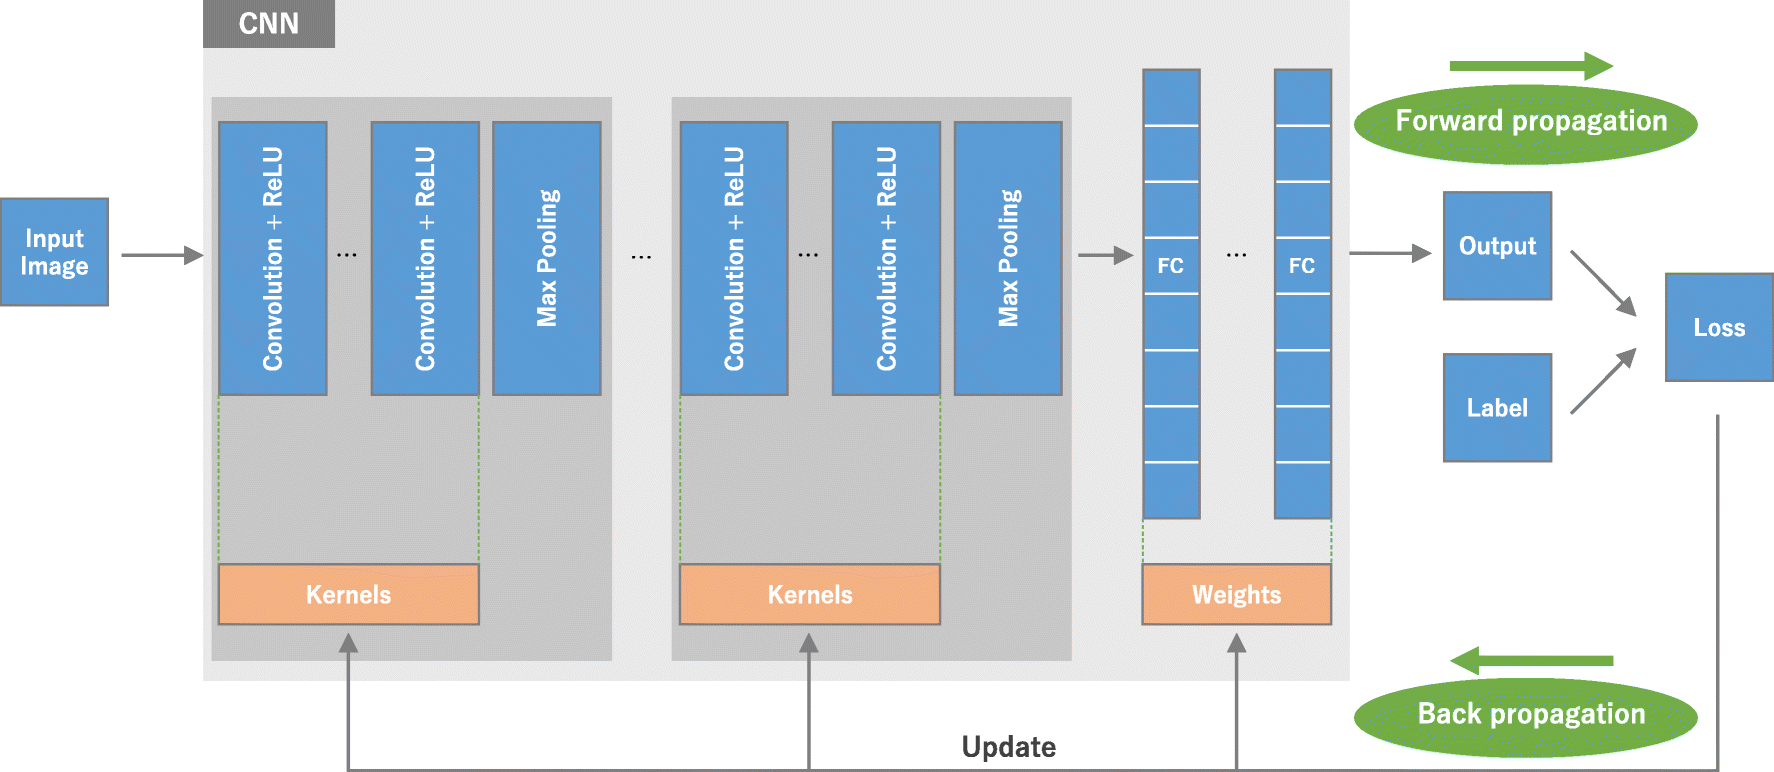

In [ ]:
cv2_imshow(image)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import zipfile
from tqdm import tqdm
from glob import glob
from shutil import copy, move

## Data Preparation

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/input"

/content/drive/MyDrive/Colab Notebooks/input


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/input


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=bffc32bfb2c49f853ff582fa720d221de3b4bf852786a3fc48dc4d4a497aafd0
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c dogs-vs-cats

403 - Forbidden


In [ ]:
zipfile_dir = '../input/train.zip'
train_dir = zipfile.ZipFile(zipfile_dir, 'r')
train_dir.extractall()

zipfile_dir = '../input/test.zip'
test_dir = zipfile.ZipFile(zipfile_dir, 'r')
test_dir.extractall()

In [ ]:
TRAIN_DIR = './train'
TEST_DIR = './test'

train_set = os.listdir(TRAIN_DIR)
test_set = os.listdir(TEST_DIR)

print('#train images: %s'%len(train_set))
print('#test images: %s'%len(test_set))
print(train_set[:5])
print(test_set[:5])

#train images: 25000
#test images: 12500
['dog.11625.jpg', 'cat.7283.jpg', 'cat.7019.jpg', 'cat.4759.jpg', 'cat.3762.jpg']
['10395.jpg', '6709.jpg', '2047.jpg', '1209.jpg', '4352.jpg']


In [ ]:
dog_train_dir = './training/dog'
dog_val_dir = './validation/dog'
cat_train_dir = './training/cat'
cat_val_dir = './validation/cat'

file_dirs = [dog_train_dir, dog_val_dir, cat_train_dir, cat_val_dir]

for dir in file_dirs:
    os.makedirs(dir,exist_ok = True)

In [ ]:
all_dogs = glob('./train/dog*jpg')
all_cats = glob('./train/cat*jpg')

print(len(all_dogs))
print(len(all_cats))

12500
12500


In [ ]:
from sklearn.model_selection import train_test_split

dogs_train, dogs_test = train_test_split(all_dogs, test_size=0.1, shuffle=True,random_state = 100)
cats_train, cats_test = train_test_split(all_cats, test_size=0.1, shuffle=True,random_state = 100)

In [ ]:
for name in tqdm(dogs_train):
  copy(name , os.path.join(dog_train_dir , name.split('/')[-1]))
for name in tqdm(cats_train):
  copy(name , os.path.join(cat_train_dir , name.split('/')[-1]))
  
for name in tqdm(dogs_test):
  copy(name , os.path.join(dog_val_dir , name.split('/')[-1]))
for name in tqdm(cats_test):
  copy(name , os.path.join(cat_val_dir , name.split('/')[-1]))

100%|██████████| 1250/1250 [00:00<00:00, 9382.56it/s]


In [ ]:
print(len(os.listdir(dog_train_dir)))
print(len(os.listdir(cat_train_dir)))
print(len(os.listdir(dog_val_dir)))
print(len(os.listdir(cat_val_dir)))

11250
11250
1250
1250


## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = './training'
train_datagen = ImageDataGenerator(rescale=1 / 255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = './validation'
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 64,
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal',input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 75, 128)      

In [ ]:
check_point_path = './best.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = check_point_path,
    monitor = 'val_accuracy',
    save_weights_only=False,
    save_best_only=True,
    verbose=1
)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.0005,decay=1e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [ ]:
print('Num Params : ',model.count_params())
model_history = model.fit(
    train_generator,
    epochs=50,
    verbose=1,
    callbacks = [model_checkpoint],
    validation_data=validation_generator
)

Num Params :  52351425
Epoch 1/50
352/352 [==============================] - 95s 267ms/step - loss: 4.1532 - acc: 0.4996 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/50
352/352 [==============================] - 94s 267ms/step - loss: 0.6927 - acc: 0.5114 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 3/50
352/352 [==============================] - 94s 266ms/step - loss: 0.6818 - acc: 0.5467 - val_loss: 0.6319 - val_acc: 0.6448
Epoch 4/50
352/352 [==============================] - 94s 265ms/step - loss: 0.6167 - acc: 0.6386 - val_loss: 0.5948 - val_acc: 0.6764
Epoch 5/50
352/352 [==============================] - 93s 265ms/step - loss: 0.5915 - acc: 0.6752 - val_loss: 0.5745 - val_acc: 0.7120
Epoch 6/50
352/352 [==============================] - 93s 265ms/step - loss: 0.5737 - acc: 0.6997 - val_loss: 0.6002 - val_acc: 0.6708
Epoch 7/50
352/352 [==============================] - 94s 266ms/step - loss: 0.5447 - acc: 0.7265 - val_loss: 0.5440 - val_acc: 0.7236
Epoch 8/50
352/352 [============

## Model Evaluation

Plotting Loss and Accuracy

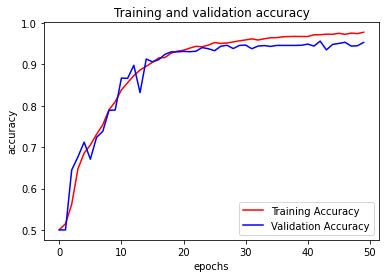

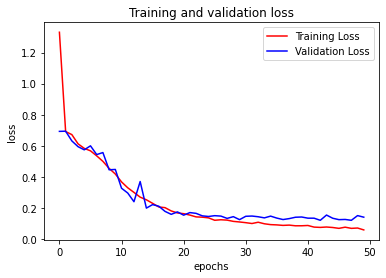

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=model_history.history['acc']
val_acc=model_history.history['val_acc']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

# Desired output. Charts with training and validation metrics. 

In [ ]:
test_file = os.listdir("./test1")
test_df = pd.DataFrame({
    'filename': test_file
})
test_df

,filename
0,10395.jpg
1,6709.jpg
2,2047.jpg
3,1209.jpg
4,4352.jpg
...,...
12495,2398.jpg
12496,7169.jpg
12497,9785.jpg
12498,8760.jpg


In [ ]:
TESTING_DIR = './test1'
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    directory = TESTING_DIR,
    x_col='filename',
    y_col=None,
    batch_size=64,
    target_size=(150, 150),
    shuffle = False,
    class_mode = None
)

Found 12500 validated image filenames.


In [ ]:
test_generator.reset()
y_pred = model.predict(test_generator)

To see the class mapping of dogs and cats, we have to see class_indices from training dataset

In [ ]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

Let's make labels

In [ ]:
y_pred_classification = np.where(y_pred > 0.5, 1, 0)
y_pred_classification

array([1])

Seeing some results

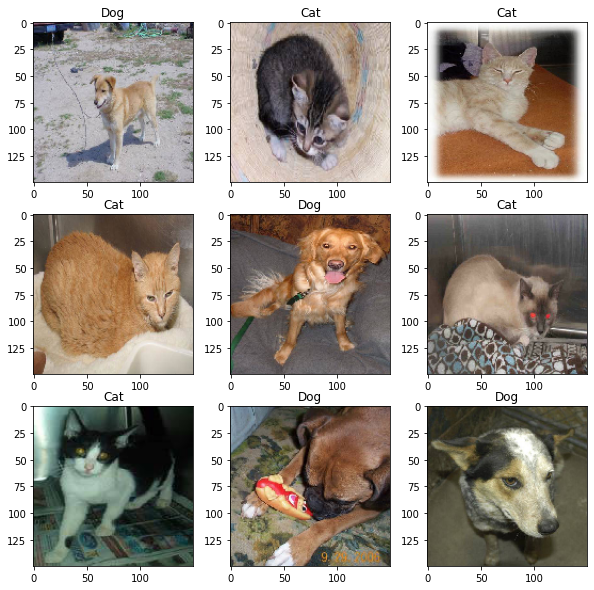

In [ ]:
test_generator.reset()
test_images = test_generator[0][:9]

fig, ax = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i, img in enumerate(test_images):
    ax[i//3][i%3].imshow(img)
    if y_pred_classification[i]==1:
        label = 'Dog'
    else:
        label = 'Cat'
    ax[i//3][i%3].set_title(label)

Visualizing first 9 filters

In [ ]:
model.layers

(150, 150, 64)


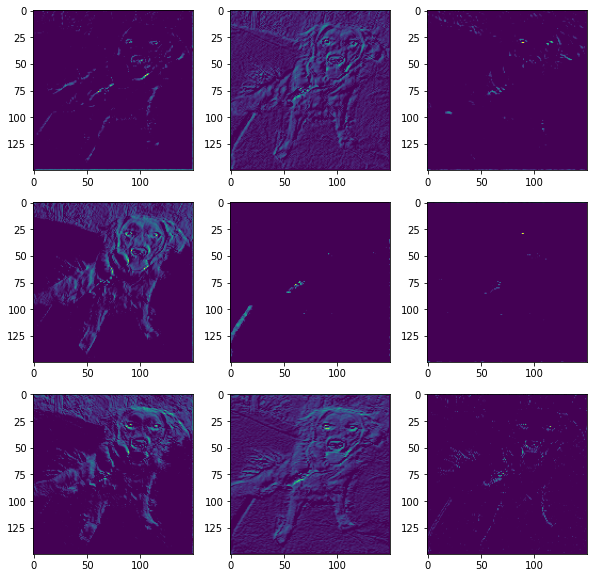

In [ ]:
first_conv = model.layers[0]
output_layer1 = first_conv(test_images)[4]

print(output_layer1.shape)
fig, ax = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i in range(9):
  ax[i//3][i%3].imshow(output_layer1[:,:,i])

## Submition

In [ ]:
submission = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
submission['label'] = y_pred_classification
submission

,id,label
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
12495,12496,1
12496,12497,1
12497,12498,1
12498,12499,0


In [ ]:
submission.to_csv('submission.csv',index='False')